In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import PIL.Image as Image
from IPython import display

import numpy as np
import tensorflow as tf

Making dummy time series...
(1200, 4)
Done!
(60, 1200, 4)


<IPython.core.display.Javascript object>


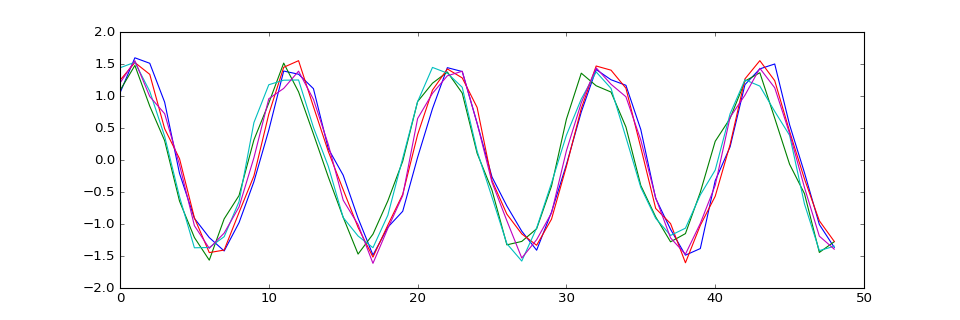

In [19]:
# Create some toy sequences with sin waves
num_vis = 4
timesteps = 15

FREQS = [30, 40, 50, 60]
AMPS = [3, 1, 0.4, 1.5]
NSAMPLE = 60
SEQ_LEN = 1200

time_data = np.arange(SEQ_LEN) / 50

X_data = []

print('Making dummy time series...')
for i in range(NSAMPLE):
    r_data = np.float32(np.random.rand(SEQ_LEN, num_vis)) / 20 # random noise
    x = np.asarray([np.float32(np.sin(FREQS[d] * time_data + np.random.rand()) * (AMPS[d]+np.random.rand()/20)) for d in range(num_vis)]).T
    x = np.asarray([d + np.random.rand() for d in x])
    X_data.append(x)

print(x.shape)

X_data = np.asarray(X_data)

X_data_flat = np.concatenate([m for m in X_data], axis=0)

data_mean = np.mean(X_data_flat, axis=0)
data_std = np.std(X_data_flat, axis=0)

X_data_normalized = [(d - data_mean) / data_std for d in X_data]

def makeSeqHistory(seqs, order, step=1):
    history = []
    outputs = []
    for m in seqs:
        for i in range(0, len(m)-order, step):
            history.append(m[i:i+order].flatten())
            outputs.append(m[i+order])

    return np.asarray(history), np.asarray(outputs)


# cond_data, visible_data = makeSeqHistory(X_data, timesteps)
cond_data, visible_data = makeSeqHistory(X_data_normalized, timesteps)

num_cond = cond_data[0].shape[0]
print('Done!')

X_data_normalized = np.asarray(X_data_normalized)

print(X_data_normalized.shape)
_=plt.figure(figsize=(12,4))
_=plt.plot(X_data_normalized[1,1:50, 0])
_=plt.plot(X_data_normalized[2,1:50, 0])
_=plt.plot(X_data_normalized[3,1:50, 0])
_=plt.plot(X_data_normalized[4,1:50, 0])
_=plt.plot(X_data_normalized[5,1:50, 0])
